In [ ]:
%load_ext autoreload
%load_ext line_profiler
%load_ext snakeviz
%autoreload 2
%matplotlib notebook

from seqdata.core import *
from seqdata.model import *
from seqdata.learner import *
from fastai2.basics import *
from fastai2.callback.schedule import *
from fastai2.callback.rnn import *

## Input Only

In [ ]:
f_paths = '/mnt/Data/Systemidentification/Silverbox/'
hdf_files = get_hdf_files(f_paths)

seq = DataBlock(blocks=(SequenceBlock.from_hdf(['u'],TensorSequencesInput),
                        SequenceBlock.from_hdf(['y'],TensorSequencesOutput)),
                 get_items=CreateDict([DfHDFCreateWindows(win_sz=200,stp_sz=200,clm='u')]),
                 splitter=FuncSplitter(lambda o: 'test' in str(o['path']) ))

db = seq.databunch(hdf_files,shufflish=True)

In [ ]:
import optuna

In [ ]:
def objective(trial):
    hl_depth = trial.suggest_int('hl_depth', 2, 7)
    hl_width = trial.suggest_int('hl_width', 1, 200)
    alpha = trial.suggest_loguniform('alpha', 1e-1, 10)
    beta = trial.suggest_loguniform('beta', 1e-1, 10)
    
    lrn = TCNLearner(db,hl_depth=hl_depth,hl_width=hl_width,alpha=alpha,beta=beta,early_stop=5)
    lrn.fit_one_cycle(100,lr_max=3e-3,pct_start=0.05)
    return lrn.validate()[1]

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=100)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.939010,0.148666,0.361670,00:02
1,0.747252,0.069975,0.253611,00:02
2,0.500663,0.027105,0.158077,00:02
3,0.310131,0.019971,0.134418,00:02
4,0.189065,0.015930,0.118799,00:02
5,0.116202,0.013095,0.106496,00:02
6,0.072694,0.010967,0.096372,00:02
7,0.046463,0.008744,0.085327,00:02
8,0.030489,0.007008,0.075900,00:02
9,0.020641,0.005486,0.066575,00:02


No improvement since epoch 31: early stopping


[I 2020-01-21 19:12:39,353] Finished trial#0 resulted in value: 0.03568289428949356. Current best value is 0.03568289428949356 with parameters: {'hl_depth': 3, 'hl_width': 36, 'alpha': 0.595368415045121, 'beta': 3.325347749427035}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.526601,0.030997,0.153989,00:03
1,1.075846,0.028256,0.154639,00:02
2,0.615455,0.021955,0.132986,00:02
3,0.346546,0.015317,0.110447,00:02
4,0.204635,0.015916,0.111064,00:02
5,0.127254,0.010963,0.093108,00:02
6,0.082723,0.007490,0.078213,00:02
7,0.050144,0.005589,0.066812,00:02
8,0.032519,0.030304,0.155260,00:02
9,0.031149,0.003186,0.051167,00:02


No improvement since epoch 19: early stopping


[I 2020-01-21 19:13:53,071] Finished trial#1 resulted in value: 0.026185540482401848. Current best value is 0.026185540482401848 with parameters: {'hl_depth': 5, 'hl_width': 96, 'alpha': 9.097223383165762, 'beta': 1.0485806285209123}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.467844,0.037981,0.173113,00:02
1,0.280096,0.031897,0.149666,00:02
2,0.160339,0.028687,0.142803,00:02
3,0.093073,0.034620,0.157952,00:02
4,0.067972,0.016252,0.107745,00:02
5,0.042558,0.013599,0.099017,00:02
6,0.029059,0.027088,0.144317,00:02
7,0.024442,0.007975,0.075555,00:02
8,0.016953,0.011454,0.092671,00:02
9,0.016776,0.005570,0.066066,00:02


No improvement since epoch 16: early stopping


[I 2020-01-21 19:14:56,037] Finished trial#2 resulted in value: 0.03629656881093979. Current best value is 0.026185540482401848 with parameters: {'hl_depth': 5, 'hl_width': 96, 'alpha': 9.097223383165762, 'beta': 1.0485806285209123}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.660450,0.091344,0.288713,00:02
1,0.431527,0.087119,0.290253,00:03
2,0.272962,0.044862,0.206712,00:02
3,0.164108,0.028643,0.163811,00:03
4,0.098858,0.017282,0.125331,00:02
5,0.062746,0.011815,0.101337,00:02
6,0.040246,0.019962,0.130400,00:02
7,0.027836,0.006665,0.073710,00:02
8,0.019689,0.003406,0.051365,00:03
9,0.014169,0.005088,0.064184,00:02


No improvement since epoch 29: early stopping


[I 2020-01-21 19:16:41,725] Finished trial#3 resulted in value: 0.015437421388924122. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.319132,0.066902,0.228308,00:03
1,0.952430,0.031076,0.153512,00:02
2,0.562885,0.018880,0.120286,00:02
3,0.321460,0.014321,0.104874,00:02
4,0.187819,0.012595,0.098676,00:02
5,0.111864,0.009560,0.085981,00:02
6,0.069003,0.009976,0.087728,00:02
7,0.043099,0.005164,0.062761,00:02
8,0.028105,0.011688,0.095207,00:02
9,0.019522,0.003923,0.054854,00:02


No improvement since epoch 25: early stopping


[I 2020-01-21 19:18:12,323] Finished trial#4 resulted in value: 0.023343058302998543. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.795707,0.074296,0.236822,00:03
1,0.503310,0.011597,0.090157,00:03
2,0.303547,0.010550,0.084608,00:02
3,0.179387,0.008425,0.074484,00:02
4,0.107952,0.006682,0.071420,00:02
5,0.069677,0.005458,0.062294,00:02
6,0.043868,0.005126,0.059607,00:02
7,0.030465,0.003182,0.049706,00:03
8,0.023702,0.011636,0.091618,00:02
9,0.017695,0.002176,0.039939,00:03


No improvement since epoch 21: early stopping


[I 2020-01-21 19:19:34,081] Finished trial#5 resulted in value: 0.020869018509984016. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.103935,0.234839,0.469887,00:03
1,0.631547,0.114853,0.317714,00:02
2,0.347550,0.076470,0.259153,00:02
3,0.195658,0.056856,0.221636,00:02
4,0.116098,0.046186,0.198088,00:02
5,0.072461,0.031724,0.161330,00:02
6,0.046489,0.026549,0.147206,00:02
7,0.033359,0.016897,0.116754,00:02
8,0.023594,0.012806,0.097784,00:02
9,0.016739,0.010190,0.089802,00:02


No improvement since epoch 19: early stopping


[I 2020-01-21 19:20:43,914] Finished trial#6 resulted in value: 0.03920932859182358. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.762838,0.097291,0.265875,00:03
1,0.596129,0.047579,0.208594,00:02
2,0.399840,0.025892,0.149477,00:02
3,0.241540,0.018211,0.120361,00:03
4,0.144645,0.012127,0.098121,00:02
5,0.087756,0.010926,0.091539,00:02
6,0.054260,0.007532,0.076339,00:02
7,0.035099,0.006807,0.072974,00:02
8,0.023530,0.006389,0.070591,00:03
9,0.015718,0.003331,0.051172,00:03


No improvement since epoch 16: early stopping


[I 2020-01-21 19:21:51,854] Finished trial#7 resulted in value: 0.02840372920036316. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.366518,0.104762,0.323411,00:02
1,0.803559,0.071917,0.263685,00:03
2,0.444314,0.031287,0.173483,00:02
3,0.330616,0.033448,0.161104,00:03
4,0.204627,0.013065,0.111182,00:03
5,0.171542,0.020429,0.131483,00:03
6,0.115983,0.004828,0.066070,00:02
7,0.074847,0.003207,0.052285,00:03
8,0.060942,0.038508,0.183543,00:03
9,0.048188,0.002726,0.046781,00:03


No improvement since epoch 15: early stopping


[I 2020-01-21 19:22:56,985] Finished trial#8 resulted in value: 0.03107861429452896. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.561191,0.047141,0.184150,00:02
1,0.347068,0.034661,0.156436,00:02
2,0.190226,0.027238,0.139824,00:02
3,0.110013,0.023189,0.127987,00:02
4,0.068276,0.017511,0.109572,00:02
5,0.046477,0.013964,0.098588,00:02
6,0.030260,0.010880,0.086509,00:02
7,0.021899,0.010856,0.088495,00:02
8,0.018534,0.033641,0.161331,00:02
9,0.014859,0.005148,0.061918,00:02


No improvement since epoch 21: early stopping


[I 2020-01-21 19:24:13,423] Finished trial#9 resulted in value: 0.03659753501415253. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.613260,0.074710,0.240703,00:03
1,0.576934,0.064360,0.221809,00:03
2,0.488524,0.048433,0.191750,00:03
3,0.364103,0.033985,0.164827,00:02
4,0.248981,0.021931,0.135922,00:03
5,0.163341,0.014629,0.110242,00:03
6,0.106429,0.009669,0.089059,00:03
7,0.069665,0.006829,0.074094,00:03
8,0.046016,0.004770,0.061664,00:02
9,0.030636,0.003743,0.054127,00:03


No improvement since epoch 91: early stopping


[I 2020-01-21 19:29:04,671] Finished trial#10 resulted in value: 0.016414949670433998. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.981530,0.087049,0.291759,00:03
1,0.939827,0.098806,0.312504,00:02
2,0.829658,0.067972,0.259275,00:02
3,0.658424,0.038362,0.194413,00:03
4,0.478450,0.015691,0.122794,00:02
5,0.331959,0.010432,0.099441,00:02
6,0.226987,0.008123,0.087611,00:02
7,0.154187,0.007400,0.083811,00:02
8,0.104587,0.006688,0.079463,00:02
9,0.070861,0.005976,0.074810,00:03


No improvement since epoch 93: early stopping


[I 2020-01-21 19:34:02,092] Finished trial#11 resulted in value: 0.016266901046037674. Current best value is 0.015437421388924122 with parameters: {'hl_depth': 7, 'hl_width': 63, 'alpha': 1.7255860147584772, 'beta': 0.3515632737303763}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.867693,0.100050,0.296603,00:02
1,0.822872,0.087263,0.281372,00:02
2,0.711455,0.048644,0.209738,00:02
3,0.544398,0.023967,0.141183,00:02
4,0.375654,0.012674,0.100045,00:02
5,0.246295,0.008641,0.081710,00:03
6,0.159329,0.006215,0.068177,00:03
7,0.102161,0.005070,0.061246,00:03
8,0.065185,0.004175,0.055559,00:02
9,0.041545,0.003653,0.051721,00:02


No improvement since epoch 87: early stopping


[I 2020-01-21 19:38:38,984] Finished trial#12 resulted in value: 0.014789280481636524. Current best value is 0.014789280481636524 with parameters: {'hl_depth': 6, 'hl_width': 7, 'alpha': 3.5005367855337366, 'beta': 0.15214535434411094}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.770399,0.028758,0.160278,00:03
1,0.514589,0.024529,0.149759,00:02
2,0.286974,0.020145,0.131521,00:02
3,0.176267,0.018196,0.122381,00:02
4,0.108894,0.016034,0.110393,00:02
5,0.075626,0.006042,0.065792,00:02
6,0.047910,0.005881,0.067232,00:02
7,0.040768,0.003037,0.047780,00:03
8,0.025814,0.005048,0.062583,00:02
9,0.028393,0.004676,0.059324,00:03


No improvement since epoch 17: early stopping


[I 2020-01-21 19:39:49,030] Finished trial#13 resulted in value: 0.018935980275273323. Current best value is 0.014789280481636524 with parameters: {'hl_depth': 6, 'hl_width': 7, 'alpha': 3.5005367855337366, 'beta': 0.15214535434411094}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.443472,0.123388,0.318776,00:03
1,0.312324,0.035736,0.168260,00:02
2,0.211064,0.031962,0.159915,00:03
3,0.133518,0.024761,0.139555,00:03
4,0.083174,0.017460,0.116721,00:02
5,0.052221,0.013069,0.100552,00:03
6,0.033302,0.009705,0.085527,00:02
7,0.021566,0.006944,0.072993,00:02
8,0.014260,0.005229,0.062498,00:03
9,0.009614,0.004314,0.056651,00:02


No improvement since epoch 31: early stopping


[I 2020-01-21 19:41:40,084] Finished trial#14 resulted in value: 0.014105439186096191. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.276241,0.789568,0.790510,00:02
1,1.070590,0.473162,0.613395,00:02
2,0.731366,0.136504,0.336549,00:02
3,0.455617,0.059610,0.218425,00:02
4,0.282036,0.031908,0.158786,00:02
5,0.175609,0.020357,0.127974,00:02
6,0.110930,0.014109,0.106876,00:02
7,0.071267,0.010042,0.090353,00:02
8,0.046728,0.007601,0.078206,00:02
9,0.031306,0.005736,0.068153,00:02


No improvement since epoch 64: early stopping


[I 2020-01-21 19:45:06,574] Finished trial#15 resulted in value: 0.01996123045682907. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.471665,0.501462,0.660645,00:03
1,1.120249,0.224412,0.453238,00:03
2,0.698595,0.082770,0.267675,00:02
3,0.413201,0.055226,0.217890,00:02
4,0.246591,0.036738,0.174087,00:02
5,0.149474,0.028029,0.149945,00:02
6,0.091966,0.021620,0.129228,00:02
7,0.057317,0.017766,0.115164,00:02
8,0.036221,0.013138,0.097666,00:02
9,0.023385,0.010676,0.086941,00:02


No improvement since epoch 25: early stopping


[I 2020-01-21 19:46:39,708] Finished trial#16 resulted in value: 0.018014272674918175. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.823525,0.382213,0.606239,00:02
1,0.807233,0.392389,0.613123,00:02
2,0.766365,0.363444,0.592382,00:02
3,0.690600,0.311171,0.548288,00:02
4,0.593185,0.228791,0.469254,00:03
5,0.489222,0.175933,0.409721,00:02
6,0.393910,0.123562,0.342095,00:02
7,0.311129,0.094106,0.297494,00:02
8,0.242613,0.064705,0.245697,00:02
9,0.186764,0.048046,0.210737,00:02


No improvement since epoch 92: early stopping


[I 2020-01-21 19:51:19,666] Finished trial#17 resulted in value: 0.029333001002669334. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.140485,0.079736,0.272004,00:03
1,0.734434,0.031139,0.158049,00:02
2,0.426608,0.022503,0.142400,00:03
3,0.243281,0.015905,0.119209,00:03
4,0.150022,0.026220,0.144222,00:02
5,0.092139,0.006751,0.076548,00:02
6,0.064178,0.014461,0.108574,00:03
7,0.044378,0.007850,0.082076,00:03
8,0.028606,0.003491,0.055768,00:03
9,0.021642,0.005178,0.068715,00:02


No improvement since epoch 13: early stopping


[I 2020-01-21 19:52:17,783] Finished trial#18 resulted in value: 0.026205724105238914. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.336601,0.044083,0.190750,00:03
1,0.236799,0.017785,0.126025,00:02
2,0.155734,0.015092,0.112868,00:02
3,0.095847,0.013030,0.105202,00:02
4,0.058575,0.011624,0.097728,00:02
5,0.036280,0.011019,0.094035,00:02
6,0.023922,0.009079,0.084702,00:02
7,0.015512,0.007443,0.076563,00:02
8,0.010365,0.003530,0.053834,00:02
9,0.008344,0.006036,0.069637,00:02


No improvement since epoch 35: early stopping


[I 2020-01-21 19:54:18,068] Finished trial#19 resulted in value: 0.018994156271219254. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.268099,0.162825,0.387641,00:02
1,0.218319,0.097786,0.299985,00:02
2,0.153972,0.037910,0.184712,00:02
3,0.103429,0.026503,0.151127,00:02
4,0.068313,0.017618,0.119941,00:02
5,0.045451,0.013115,0.101736,00:02
6,0.030917,0.009456,0.085376,00:02
7,0.021585,0.007208,0.073877,00:02
8,0.015537,0.005609,0.064776,00:02
9,0.011551,0.004585,0.058454,00:02


No improvement since epoch 32: early stopping


[I 2020-01-21 19:56:01,307] Finished trial#20 resulted in value: 0.0408155620098114. Current best value is 0.014105439186096191 with parameters: {'hl_depth': 6, 'hl_width': 41, 'alpha': 1.3238756950382333, 'beta': 0.2771699889082222}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.609487,0.067235,0.215882,00:03
1,0.394320,0.015813,0.107478,00:03
2,0.248458,0.009733,0.083686,00:03
3,0.150509,0.007847,0.074392,00:03
4,0.091305,0.006750,0.069960,00:03
5,0.056061,0.005073,0.061976,00:02
6,0.036017,0.004972,0.066192,00:02
7,0.024761,0.008584,0.078261,00:02
8,0.016790,0.002686,0.046167,00:03
9,0.013102,0.003330,0.049511,00:03


No improvement since epoch 29: early stopping


[I 2020-01-21 19:57:47,929] Finished trial#21 resulted in value: 0.012971566058695316. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.399759,0.041191,0.193283,00:03
1,0.280177,0.034772,0.168362,00:02
2,0.176535,0.023628,0.143745,00:03
3,0.104811,0.016410,0.111153,00:03
4,0.067735,0.013050,0.097396,00:03
5,0.043860,0.007052,0.073836,00:02
6,0.028974,0.006267,0.067780,00:03
7,0.023542,0.004326,0.057808,00:03
8,0.016363,0.002789,0.043224,00:03
9,0.011404,0.003478,0.047794,00:03


No improvement since epoch 19: early stopping


[I 2020-01-21 19:59:04,364] Finished trial#22 resulted in value: 0.02171686850488186. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.569275,0.150477,0.334512,00:02
1,0.468814,0.083316,0.249079,00:03
2,0.313679,0.021875,0.127771,00:02
3,0.197053,0.015830,0.111096,00:03
4,0.122874,0.010248,0.087494,00:02
5,0.076868,0.007569,0.073900,00:02
6,0.048729,0.005790,0.063792,00:02
7,0.031415,0.004870,0.058326,00:02
8,0.020697,0.004281,0.054665,00:03
9,0.013967,0.003908,0.052384,00:02


No improvement since epoch 47: early stopping


[I 2020-01-21 20:01:42,590] Finished trial#23 resulted in value: 0.012987765483558178. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.545511,0.096308,0.251348,00:03
1,0.342170,0.032065,0.162237,00:03
2,0.219229,0.023794,0.138969,00:03
3,0.137322,0.019990,0.126256,00:03
4,0.085115,0.014629,0.104463,00:03
5,0.053365,0.013075,0.098278,00:03
6,0.037687,0.012648,0.097353,00:02
7,0.025736,0.010002,0.085208,00:02
8,0.017962,0.005619,0.064872,00:03
9,0.013616,0.007801,0.074847,00:03


No improvement since epoch 19: early stopping


[I 2020-01-21 20:02:59,300] Finished trial#24 resulted in value: 0.026734234765172005. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.611965,0.070837,0.240878,00:03
1,0.395013,0.039987,0.186079,00:02
2,0.236755,0.029371,0.157485,00:03
3,0.137429,0.025270,0.145339,00:03
4,0.081539,0.010255,0.096917,00:02
5,0.054561,0.016361,0.115735,00:03
6,0.033475,0.021092,0.129935,00:03
7,0.026417,0.007174,0.070660,00:02
8,0.018490,0.010655,0.092070,00:03
9,0.013994,0.012511,0.097012,00:02


No improvement since epoch 35: early stopping


[I 2020-01-21 20:05:03,937] Finished trial#25 resulted in value: 0.014384831301867962. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.492028,0.098147,0.280211,00:02
1,0.352908,0.046783,0.201031,00:02
2,0.217325,0.019818,0.132881,00:02
3,0.133406,0.016465,0.120291,00:02
4,0.082438,0.013168,0.106474,00:02
5,0.051577,0.010077,0.092009,00:02
6,0.032919,0.008173,0.082019,00:02
7,0.021512,0.006485,0.072677,00:02
8,0.014412,0.005336,0.066211,00:02
9,0.010008,0.004573,0.060362,00:02


No improvement since epoch 31: early stopping


[I 2020-01-21 20:06:53,116] Finished trial#26 resulted in value: 0.020169485360383987. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.432649,0.186129,0.379353,00:02
1,0.319608,0.088278,0.270502,00:03
2,0.209554,0.038876,0.180148,00:03
3,0.136906,0.027778,0.149304,00:02
4,0.088782,0.020348,0.126825,00:02
5,0.057351,0.014465,0.106176,00:02
6,0.037289,0.010518,0.090141,00:03
7,0.024520,0.008854,0.083793,00:03
8,0.016422,0.006696,0.072393,00:02
9,0.011238,0.005121,0.063905,00:02


No improvement since epoch 39: early stopping


[I 2020-01-21 20:09:11,313] Finished trial#27 resulted in value: 0.013848520815372467. Current best value is 0.012971566058695316 with parameters: {'hl_depth': 7, 'hl_width': 59, 'alpha': 1.3920580391748771, 'beta': 0.375834474732935}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.574699,0.152354,0.383805,00:02
1,0.450272,0.104113,0.315887,00:03
2,0.306147,0.046399,0.204690,00:03
3,0.204028,0.032383,0.169978,00:02
4,0.134126,0.020908,0.134705,00:03
5,0.087680,0.014242,0.108042,00:03
6,0.057665,0.010322,0.090904,00:02
7,0.038306,0.007419,0.073806,00:03
8,0.025857,0.005969,0.065790,00:03
9,0.017778,0.004570,0.056754,00:03


No improvement since epoch 55: early stopping


[I 2020-01-21 20:12:17,062] Finished trial#28 resulted in value: 0.012048173695802689. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.858082,0.410060,0.633064,00:02
1,0.700186,0.170586,0.406577,00:03
2,0.462009,0.023074,0.143750,00:03
3,0.288868,0.013037,0.102301,00:02
4,0.181781,0.009801,0.087772,00:02
5,0.115509,0.008317,0.079256,00:02
6,0.074450,0.006919,0.071724,00:02
7,0.048742,0.006196,0.067646,00:03
8,0.032541,0.005089,0.061411,00:02
9,0.022164,0.004477,0.057839,00:02


No improvement since epoch 39: early stopping


[I 2020-01-21 20:14:32,889] Finished trial#29 resulted in value: 0.014677238650619984. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.242813,0.328454,0.550053,00:03
1,0.783918,0.115941,0.339213,00:03
2,0.443864,0.058443,0.233795,00:03
3,0.259531,0.039112,0.189681,00:02
4,0.155386,0.024909,0.150419,00:02
5,0.094653,0.017040,0.121792,00:02
6,0.058658,0.012069,0.099040,00:03
7,0.037038,0.008288,0.081983,00:03
8,0.024414,0.009268,0.086250,00:02
9,0.016647,0.004895,0.061552,00:03


No improvement since epoch 23: early stopping


[I 2020-01-21 20:16:00,973] Finished trial#30 resulted in value: 0.022089386358857155. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.251767,0.072972,0.247973,00:03
1,0.190925,0.031331,0.159195,00:02
2,0.132360,0.016637,0.116766,00:03
3,0.087289,0.011166,0.095311,00:02
4,0.056490,0.007507,0.079009,00:02
5,0.036594,0.006371,0.073147,00:03
6,0.024040,0.004904,0.064002,00:02
7,0.016106,0.003691,0.055356,00:03
8,0.011027,0.002718,0.046991,00:03
9,0.007823,0.002200,0.040718,00:03


No improvement since epoch 15: early stopping


[I 2020-01-21 20:17:05,071] Finished trial#31 resulted in value: 0.02373989298939705. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.421970,0.156646,0.363509,00:03
1,0.344746,0.110768,0.313281,00:02
2,0.233033,0.042781,0.190599,00:03
3,0.151036,0.027245,0.150863,00:03
4,0.099209,0.019835,0.131711,00:03
5,0.065928,0.015119,0.116136,00:02
6,0.044416,0.011567,0.102174,00:03
7,0.030311,0.008515,0.088109,00:02
8,0.020998,0.006008,0.073928,00:03
9,0.014777,0.004851,0.066376,00:02


No improvement since epoch 43: early stopping


[I 2020-01-21 20:19:33,568] Finished trial#32 resulted in value: 0.013941284269094467. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.389141,0.058146,0.227503,00:03
1,0.274299,0.025433,0.150866,00:02
2,0.178282,0.016527,0.119507,00:02
3,0.112266,0.011121,0.094380,00:03
4,0.069743,0.008770,0.080522,00:02
5,0.043561,0.007446,0.072583,00:02
6,0.027740,0.005861,0.063239,00:02
7,0.018742,0.005208,0.059046,00:02
8,0.012509,0.004177,0.056442,00:03
9,0.009434,0.004485,0.057612,00:03


No improvement since epoch 21: early stopping


[I 2020-01-21 20:20:55,493] Finished trial#33 resulted in value: 0.01896488107740879. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.619231,0.079863,0.262867,00:02
1,0.379080,0.044619,0.208062,00:02
2,0.229582,0.027092,0.159378,00:02
3,0.136212,0.021675,0.139416,00:03
4,0.082190,0.008926,0.088603,00:02
5,0.051460,0.010040,0.090474,00:02
6,0.032953,0.007918,0.078770,00:02
7,0.023302,0.004076,0.056172,00:02
8,0.016878,0.008235,0.079349,00:02
9,0.012663,0.002256,0.039258,00:02


No improvement since epoch 27: early stopping


[I 2020-01-21 20:22:34,381] Finished trial#34 resulted in value: 0.016692323610186577. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.466166,0.021746,0.127707,00:03
1,0.300652,0.013908,0.102948,00:03
2,0.180935,0.008839,0.078837,00:02
3,0.113839,0.009434,0.084028,00:03
4,0.073443,0.006519,0.071187,00:03
5,0.053165,0.007629,0.074619,00:02
6,0.038517,0.004028,0.055206,00:02
7,0.025680,0.003081,0.046943,00:02
8,0.024378,0.003478,0.051980,00:02
9,0.016586,0.004209,0.055992,00:03


No improvement since epoch 7: early stopping


[I 2020-01-21 20:23:14,708] Finished trial#35 resulted in value: 0.046943485736846924. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.244353,0.030122,0.163163,00:03
1,0.179378,0.016380,0.118985,00:03
2,0.117200,0.012292,0.098760,00:02
3,0.071098,0.009725,0.085782,00:03
4,0.045231,0.006400,0.068126,00:02
5,0.028515,0.006082,0.066842,00:02
6,0.018605,0.002853,0.046492,00:02
7,0.014926,0.003736,0.052679,00:02
8,0.009783,0.002319,0.041250,00:02
9,0.007541,0.004157,0.055589,00:02


No improvement since epoch 19: early stopping


[I 2020-01-21 20:24:30,062] Finished trial#36 resulted in value: 0.01863396354019642. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.063762,0.100410,0.269336,00:03
1,0.839795,0.039746,0.178294,00:03
2,0.561025,0.024721,0.147653,00:03
3,0.347833,0.014210,0.105861,00:03
4,0.213181,0.009291,0.087070,00:03
5,0.131519,0.007566,0.077166,00:02
6,0.082373,0.006202,0.069512,00:02
7,0.052414,0.006304,0.067904,00:03
8,0.034044,0.005993,0.066549,00:03
9,0.022706,0.005686,0.063871,00:02


No improvement since epoch 19: early stopping


[I 2020-01-21 20:25:46,533] Finished trial#37 resulted in value: 0.02704296074807644. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.356789,0.043823,0.179556,00:02
1,0.264933,0.020665,0.125915,00:02
2,0.177331,0.016385,0.115267,00:02
3,0.109823,0.014810,0.109517,00:02
4,0.067800,0.011610,0.096837,00:02
5,0.042551,0.010387,0.090998,00:02
6,0.027410,0.009262,0.085937,00:02
7,0.018249,0.008242,0.080241,00:02
8,0.012603,0.008025,0.079169,00:02
9,0.009245,0.006411,0.070796,00:02


No improvement since epoch 33: early stopping


[I 2020-01-21 20:27:38,435] Finished trial#38 resulted in value: 0.0278925821185112. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.315451,0.141605,0.375916,00:02
1,0.279271,0.110216,0.331828,00:03
2,0.209220,0.054516,0.233175,00:03
3,0.140572,0.028709,0.167723,00:02
4,0.092313,0.016899,0.127554,00:02
5,0.060400,0.011231,0.103158,00:02
6,0.039888,0.007644,0.084264,00:02
7,0.026739,0.005831,0.072924,00:02
8,0.018318,0.004572,0.063731,00:02
9,0.012864,0.003776,0.057094,00:02


No improvement since epoch 54: early stopping


[I 2020-01-21 20:30:33,662] Finished trial#39 resulted in value: 0.0191421527415514. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.270208,0.675670,0.821551,00:03
1,1.256226,0.654026,0.808131,00:02
2,1.212019,0.597491,0.772002,00:02
3,1.120666,0.518058,0.718188,00:02
4,0.985159,0.405788,0.634963,00:02
5,0.820415,0.314892,0.559381,00:02
6,0.653294,0.224327,0.472485,00:03
7,0.503572,0.160948,0.400377,00:02
8,0.383764,0.112055,0.334027,00:03
9,0.291794,0.081815,0.284986,00:03


No improvement since epoch 90: early stopping


[I 2020-01-21 20:35:22,182] Finished trial#40 resulted in value: 0.049043942242860794. Current best value is 0.012048173695802689 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.31034490186024866, 'beta': 0.9803188686823516}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.752147,0.445119,0.601672,00:03
1,0.597221,0.272957,0.467806,00:03
2,0.374217,0.077280,0.245183,00:02
3,0.222548,0.044927,0.187811,00:03
4,0.136688,0.032362,0.158781,00:03
5,0.085906,0.024643,0.138659,00:03
6,0.055114,0.018590,0.120482,00:03
7,0.036031,0.014737,0.107383,00:03
8,0.024054,0.011521,0.094891,00:03
9,0.016431,0.009345,0.085128,00:03


No improvement since epoch 55: early stopping


[I 2020-01-21 20:38:27,175] Finished trial#41 resulted in value: 0.01130998507142067. Current best value is 0.01130998507142067 with parameters: {'hl_depth': 7, 'hl_width': 19, 'alpha': 0.3920898760549945, 'beta': 0.10066441566010918}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.203720,0.115015,0.338129,00:03
1,0.154376,0.103193,0.320590,00:02
2,0.104705,0.057443,0.239338,00:03
3,0.070135,0.033142,0.181633,00:03
4,0.046675,0.019518,0.139157,00:03
5,0.031019,0.012043,0.109113,00:03
6,0.020777,0.007985,0.088450,00:02
7,0.014119,0.005667,0.074310,00:02
8,0.009790,0.004391,0.064729,00:02
9,0.006971,0.003166,0.054781,00:02


No improvement since epoch 55: early stopping


[I 2020-01-21 20:41:28,010] Finished trial#42 resulted in value: 0.010459408164024353. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.792901,0.351227,0.592508,00:02
1,0.772686,0.343684,0.586115,00:02
2,0.715152,0.299447,0.546968,00:02
3,0.608133,0.245995,0.495236,00:02
4,0.481331,0.183594,0.425863,00:02
5,0.372586,0.137381,0.366832,00:02
6,0.286359,0.098234,0.309158,00:02
7,0.218255,0.076536,0.272197,00:02
8,0.166116,0.056395,0.233391,00:03
9,0.126116,0.044298,0.206488,00:02


No improvement since epoch 20: early stopping


[I 2020-01-21 20:42:46,719] Finished trial#43 resulted in value: 0.056596219539642334. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.946918,0.164238,0.362701,00:03
1,0.632609,0.026882,0.147968,00:02
2,0.401277,0.019325,0.129436,00:02
3,0.247079,0.013300,0.106602,00:03
4,0.151501,0.009654,0.088329,00:02
5,0.093524,0.008037,0.079503,00:03
6,0.058609,0.007229,0.074573,00:02
7,0.037317,0.006104,0.068730,00:02
8,0.024339,0.005501,0.063801,00:02
9,0.016315,0.005407,0.061118,00:02


No improvement since epoch 31: early stopping


[I 2020-01-21 20:44:37,507] Finished trial#44 resulted in value: 0.015986453741788864. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.162535,0.399068,0.568906,00:03
1,0.629081,0.099192,0.303290,00:02
2,0.336996,0.068217,0.234970,00:02
3,0.194561,0.046226,0.189692,00:02
4,0.117426,0.030276,0.155581,00:03
5,0.072508,0.019454,0.122341,00:02
6,0.045637,0.013773,0.101625,00:03
7,0.029828,0.010989,0.091896,00:02
8,0.021092,0.008584,0.075951,00:03
9,0.016894,0.006314,0.064836,00:03


No improvement since epoch 23: early stopping


[I 2020-01-21 20:46:06,871] Finished trial#45 resulted in value: 0.017926691100001335. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.309566,0.163969,0.394107,00:02
1,0.257023,0.092851,0.297425,00:02
2,0.183457,0.036093,0.183966,00:02
3,0.122416,0.021916,0.140748,00:02
4,0.079618,0.013324,0.107635,00:03
5,0.051176,0.010004,0.091175,00:02
6,0.033007,0.007373,0.076928,00:03
7,0.021481,0.006343,0.070058,00:02
8,0.014181,0.005262,0.063234,00:03
9,0.009533,0.004720,0.058894,00:03


No improvement since epoch 46: early stopping


[I 2020-01-21 20:48:42,569] Finished trial#46 resulted in value: 0.013374528847634792. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.554376,0.131864,0.309802,00:03
1,1.237449,0.053746,0.198810,00:02
2,0.821532,0.026338,0.142905,00:02
3,0.501747,0.014883,0.108890,00:02
4,0.302950,0.008577,0.082842,00:02
5,0.184173,0.006418,0.071585,00:02
6,0.113329,0.004694,0.061564,00:02
7,0.070780,0.003919,0.055754,00:03
8,0.044948,0.003578,0.052582,00:02
9,0.029212,0.003064,0.049182,00:03


No improvement since epoch 17: early stopping


[I 2020-01-21 20:49:52,491] Finished trial#47 resulted in value: 0.028981346637010574. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.402943,0.035858,0.159904,00:02
1,0.268423,0.014982,0.105049,00:02
2,0.169239,0.011092,0.089517,00:03
3,0.101987,0.009214,0.080082,00:02
4,0.062062,0.017349,0.111368,00:02
5,0.040318,0.009005,0.078706,00:02
6,0.027632,0.021273,0.119277,00:02
7,0.019524,0.002893,0.044594,00:02
8,0.016331,0.004790,0.060614,00:03
9,0.012617,0.002629,0.043278,00:02


No improvement since epoch 23: early stopping


[I 2020-01-21 20:51:18,644] Finished trial#48 resulted in value: 0.017148802056908607. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.541059,0.295391,0.531464,00:03
1,0.497468,0.225521,0.461923,00:02
2,0.396033,0.104734,0.311433,00:02
3,0.270852,0.037274,0.179841,00:03
4,0.176456,0.015871,0.113236,00:02
5,0.115145,0.011198,0.093057,00:02
6,0.076145,0.008248,0.078511,00:03
7,0.051017,0.006657,0.069333,00:02
8,0.034784,0.005360,0.061638,00:03
9,0.024164,0.004639,0.057355,00:03


No improvement since epoch 92: early stopping


[I 2020-01-21 20:56:10,687] Finished trial#49 resulted in value: 0.01115869265049696. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,4.595688,4.749594,2.084594,00:02
1,4.505618,3.689702,1.825355,00:03
2,4.217277,2.595344,1.530716,00:03
3,3.701167,1.761164,1.262884,00:02
4,3.045469,0.991115,0.948942,00:02
5,2.392232,0.643933,0.763452,00:02
6,1.830689,0.370899,0.576655,00:02
7,1.374866,0.246689,0.465452,00:02
8,1.023658,0.147015,0.353413,00:02
9,0.759626,0.102330,0.288319,00:02


No improvement since epoch 16: early stopping


[I 2020-01-21 20:57:16,575] Finished trial#50 resulted in value: 0.10601608455181122. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.008521,0.286328,0.481135,00:03
1,0.902947,0.257264,0.466177,00:02
2,0.680644,0.114015,0.316541,00:02
3,0.436582,0.044743,0.200863,00:02
4,0.268754,0.023422,0.143404,00:02
5,0.166901,0.020314,0.133782,00:03
6,0.105463,0.017062,0.122807,00:02
7,0.067849,0.013868,0.110747,00:02
8,0.044544,0.011016,0.098386,00:02
9,0.029908,0.008784,0.087126,00:02


No improvement since epoch 88: early stopping


[I 2020-01-21 21:01:55,018] Finished trial#51 resulted in value: 0.011103392578661442. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.376666,0.286772,0.534343,00:03
1,0.338192,0.222036,0.469886,00:03
2,0.261913,0.102724,0.319394,00:03
3,0.185692,0.056598,0.237348,00:02
4,0.127534,0.033575,0.182979,00:02
5,0.086431,0.022288,0.149111,00:02
6,0.058663,0.014094,0.118158,00:02
7,0.040012,0.009897,0.098269,00:02
8,0.027511,0.006980,0.081125,00:02
9,0.019058,0.004829,0.066216,00:02


No improvement since epoch 49: early stopping


[I 2020-01-21 21:04:40,942] Finished trial#52 resulted in value: 0.012875760905444622. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.603037,0.110964,0.307623,00:02
1,0.539641,0.076915,0.244072,00:03
2,0.403419,0.035374,0.162319,00:03
3,0.265218,0.020882,0.129165,00:02
4,0.170603,0.013114,0.098469,00:02
5,0.109881,0.010671,0.088509,00:02
6,0.071400,0.008717,0.081227,00:03
7,0.046932,0.007764,0.077304,00:02
8,0.031396,0.006593,0.072205,00:02
9,0.021465,0.005776,0.067584,00:03


No improvement since epoch 55: early stopping


[I 2020-01-21 21:07:45,213] Finished trial#53 resulted in value: 0.012849265709519386. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.189302,0.111628,0.326596,00:02
1,0.175796,0.092911,0.298169,00:02
2,0.143818,0.050568,0.220917,00:02
3,0.103540,0.023444,0.150207,00:02
4,0.071869,0.011845,0.104073,00:02
5,0.050311,0.008645,0.086566,00:02
6,0.036006,0.006641,0.073537,00:02
7,0.026388,0.005669,0.066624,00:02
8,0.019832,0.004987,0.061408,00:02
9,0.015252,0.004574,0.058492,00:02


No improvement since epoch 88: early stopping


[I 2020-01-21 21:11:58,535] Finished trial#54 resulted in value: 0.040414389222860336. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.460528,0.274311,0.507486,00:03
1,0.322157,0.113937,0.325365,00:02
2,0.198472,0.040109,0.191556,00:03
3,0.124899,0.020550,0.136390,00:03
4,0.079508,0.011971,0.101838,00:03
5,0.050869,0.008235,0.083719,00:03
6,0.032915,0.005829,0.068163,00:03
7,0.021633,0.004511,0.059104,00:02
8,0.014493,0.003295,0.050093,00:03
9,0.009928,0.002886,0.045469,00:03


No improvement since epoch 21: early stopping


[I 2020-01-21 21:13:20,701] Finished trial#55 resulted in value: 0.019638681784272194. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.719124,0.375874,0.559717,00:03
1,0.431791,0.089709,0.291988,00:03
2,0.250839,0.054969,0.210440,00:03
3,0.154208,0.036431,0.172445,00:03
4,0.097797,0.026693,0.147232,00:02
5,0.062944,0.020593,0.127324,00:03
6,0.041058,0.016826,0.113447,00:02
7,0.027276,0.013986,0.101953,00:03
8,0.018429,0.011192,0.091336,00:02
9,0.012738,0.009735,0.084143,00:03


No improvement since epoch 45: early stopping


[I 2020-01-21 21:15:54,928] Finished trial#56 resulted in value: 0.012149900197982788. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.382554,0.097202,0.288455,00:02
1,0.233608,0.037202,0.172046,00:02
2,0.144673,0.025995,0.138153,00:03
3,0.091875,0.018371,0.114373,00:03
4,0.058729,0.015550,0.103007,00:02
5,0.037738,0.011232,0.087279,00:02
6,0.024613,0.011125,0.088538,00:02
7,0.017057,0.008075,0.074945,00:03
8,0.011658,0.005689,0.061613,00:03
9,0.008464,0.004471,0.055071,00:03


No improvement since epoch 37: early stopping


[I 2020-01-21 21:18:04,816] Finished trial#57 resulted in value: 0.013923795893788338. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.289688,0.044464,0.203455,00:03
1,0.177739,0.043616,0.192064,00:03
2,0.108642,0.024854,0.140424,00:02
3,0.068315,0.035138,0.154854,00:02
4,0.054436,0.010162,0.087310,00:02
5,0.038590,0.006845,0.071092,00:02
6,0.028391,0.005164,0.063442,00:02
7,0.019536,0.001991,0.039755,00:02
8,0.018187,0.007945,0.077674,00:02
9,0.019532,0.001624,0.035271,00:02


No improvement since epoch 11: early stopping


[I 2020-01-21 21:18:56,397] Finished trial#58 resulted in value: 0.019402313977479935. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.154545,0.032830,0.166724,00:02
1,0.124283,0.022525,0.142964,00:02
2,0.086830,0.011970,0.104505,00:02
3,0.057702,0.009235,0.091758,00:02
4,0.038039,0.007200,0.081070,00:02
5,0.025333,0.006204,0.075258,00:02
6,0.017249,0.005077,0.067998,00:02
7,0.012080,0.004605,0.064622,00:02
8,0.008765,0.003970,0.059716,00:02
9,0.006605,0.003521,0.056042,00:02


No improvement since epoch 43: early stopping


[I 2020-01-21 21:21:11,852] Finished trial#59 resulted in value: 0.03510681912302971. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.655073,0.376145,0.576225,00:03
1,0.427114,0.097923,0.298947,00:02
2,0.249471,0.032083,0.166735,00:03
3,0.152261,0.019608,0.130441,00:03
4,0.095471,0.012504,0.103745,00:02
5,0.060795,0.009787,0.091209,00:02
6,0.039283,0.007910,0.082243,00:02
7,0.025791,0.006728,0.075160,00:03
8,0.017360,0.006592,0.075049,00:02
9,0.011957,0.004740,0.062914,00:03


No improvement since epoch 37: early stopping


[I 2020-01-21 21:23:22,813] Finished trial#60 resulted in value: 0.014292481355369091. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.820729,0.499936,0.593926,00:02
1,0.761641,0.322398,0.449112,00:02
2,0.628104,0.139090,0.314047,00:02
3,0.454712,0.072917,0.249307,00:02
4,0.311209,0.045419,0.206403,00:02
5,0.210218,0.033392,0.177748,00:03
6,0.142804,0.022072,0.144021,00:02
7,0.097712,0.015911,0.121083,00:03
8,0.067530,0.011324,0.100991,00:02
9,0.047262,0.009072,0.089244,00:03


No improvement since epoch 94: early stopping


[I 2020-01-21 21:28:26,275] Finished trial#61 resulted in value: 0.014220047742128372. Current best value is 0.010459408164024353 with parameters: {'hl_depth': 7, 'hl_width': 23, 'alpha': 0.236835855223689, 'beta': 0.10795197382963694}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.513193,0.208728,0.448643,00:03
1,0.439502,0.169705,0.406521,00:02
2,0.303811,0.071283,0.263657,00:02
3,0.190534,0.035269,0.182991,00:02
4,0.121249,0.022678,0.144726,00:03
5,0.078384,0.016349,0.121489,00:03
6,0.051447,0.011404,0.099716,00:03
7,0.034257,0.008354,0.083497,00:03
8,0.023220,0.006029,0.069230,00:03
9,0.016067,0.004677,0.059440,00:03


No improvement since epoch 87: early stopping


[I 2020-01-21 21:33:07,331] Finished trial#62 resulted in value: 0.010142622515559196. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.446676,0.144468,0.350795,00:02
1,0.342614,0.065118,0.226913,00:03
2,0.219291,0.016135,0.108675,00:03
3,0.138154,0.009831,0.084860,00:02
4,0.088013,0.006711,0.069274,00:02
5,0.056603,0.005197,0.061042,00:03
6,0.036965,0.004027,0.053568,00:03
7,0.024578,0.003346,0.048707,00:03
8,0.016714,0.002540,0.042460,00:03
9,0.011644,0.002203,0.039702,00:02


No improvement since epoch 90: early stopping


[I 2020-01-21 21:37:57,334] Finished trial#63 resulted in value: 0.010304202325642109. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.974586,0.231730,0.468107,00:03
1,1.747571,0.180683,0.411668,00:02
2,1.293492,0.078475,0.268002,00:03
3,0.835722,0.046965,0.200034,00:02
4,0.518326,0.038192,0.174614,00:02
5,0.319964,0.034645,0.161731,00:03
6,0.199079,0.032072,0.151650,00:03
7,0.125195,0.029381,0.143593,00:02
8,0.079912,0.027148,0.136331,00:02
9,0.051879,0.023875,0.127256,00:03


No improvement since epoch 45: early stopping


[I 2020-01-21 21:40:30,732] Finished trial#64 resulted in value: 0.013186896219849586. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.375886,0.084014,0.284285,00:03
1,0.302155,0.059548,0.235813,00:02
2,0.201943,0.025557,0.143743,00:03
3,0.131169,0.014575,0.102579,00:03
4,0.085872,0.009453,0.081733,00:03
5,0.056713,0.007674,0.073626,00:03
6,0.037954,0.006315,0.066451,00:02
7,0.025752,0.004990,0.059136,00:03
8,0.017778,0.004103,0.053674,00:03
9,0.012526,0.003399,0.048557,00:03


No improvement since epoch 69: early stopping


[I 2020-01-21 21:44:19,026] Finished trial#65 resulted in value: 0.010947007685899734. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.199025,0.123926,0.329228,00:02
1,0.186423,0.088203,0.269465,00:02
2,0.156927,0.048632,0.195020,00:02
3,0.118845,0.029564,0.151589,00:02
4,0.084571,0.019203,0.124116,00:02
5,0.058603,0.013608,0.103600,00:02
6,0.040592,0.009368,0.084890,00:02
7,0.028371,0.006915,0.071519,00:02
8,0.020163,0.004993,0.060115,00:02
9,0.014598,0.003956,0.053191,00:03


No improvement since epoch 73: early stopping


[I 2020-01-21 21:48:14,906] Finished trial#66 resulted in value: 0.012653933838009834. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.346334,0.104245,0.297317,00:03
1,0.239752,0.055762,0.228980,00:02
2,0.146693,0.029087,0.163831,00:02
3,0.091026,0.018266,0.126431,00:03
4,0.057015,0.010944,0.096168,00:03
5,0.036017,0.007590,0.078040,00:03
6,0.023105,0.005305,0.064200,00:03
7,0.015105,0.004152,0.055729,00:02
8,0.010116,0.003295,0.049565,00:03
9,0.006954,0.002721,0.044426,00:02


No improvement since epoch 23: early stopping


[I 2020-01-21 21:49:43,342] Finished trial#67 resulted in value: 0.01821974851191044. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.456300,0.111700,0.309415,00:03
1,0.365416,0.074497,0.258238,00:02
2,0.240308,0.027088,0.143978,00:03
3,0.152949,0.017314,0.111676,00:03
4,0.097912,0.011686,0.091207,00:02
5,0.063027,0.009413,0.081396,00:03
6,0.040988,0.008288,0.075634,00:03
7,0.027010,0.007323,0.070717,00:03
8,0.018161,0.005358,0.060364,00:03
9,0.012466,0.004923,0.057863,00:02


No improvement since epoch 59: early stopping


[I 2020-01-21 21:53:00,696] Finished trial#68 resulted in value: 0.011651957407593727. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.299215,0.086393,0.288526,00:02
1,0.213828,0.051926,0.224774,00:02
2,0.137470,0.034277,0.181885,00:03
3,0.088790,0.021669,0.140804,00:02
4,0.057820,0.013460,0.106644,00:02
5,0.037757,0.010988,0.093123,00:02
6,0.024870,0.008994,0.081598,00:03
7,0.016588,0.007216,0.071822,00:02
8,0.011283,0.006614,0.068391,00:02
9,0.007883,0.004662,0.057024,00:02


No improvement since epoch 39: early stopping


[I 2020-01-21 21:55:15,116] Finished trial#69 resulted in value: 0.012545091100037098. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.444558,0.111735,0.287820,00:03
1,0.244533,0.026479,0.148795,00:03
2,0.142992,0.015829,0.109128,00:03
3,0.087323,0.011253,0.092626,00:02
4,0.054557,0.007946,0.076098,00:03
5,0.034578,0.006898,0.072010,00:02
6,0.022311,0.006194,0.067744,00:03
7,0.014702,0.004716,0.058649,00:02
8,0.010038,0.006125,0.066629,00:03
9,0.007277,0.004313,0.057597,00:03


No improvement since epoch 31: early stopping


[I 2020-01-21 21:57:07,969] Finished trial#70 resulted in value: 0.013545619323849678. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.279681,0.125474,0.336362,00:03
1,0.224557,0.050552,0.206689,00:02
2,0.150781,0.019230,0.123801,00:02
3,0.099899,0.014248,0.110304,00:03
4,0.066586,0.010566,0.097015,00:02
5,0.044440,0.008420,0.087610,00:02
6,0.029930,0.006490,0.077201,00:03
7,0.020363,0.005233,0.069295,00:03
8,0.014099,0.004163,0.061811,00:02
9,0.009957,0.003448,0.056325,00:03


No improvement since epoch 43: early stopping


[I 2020-01-21 21:59:33,965] Finished trial#71 resulted in value: 0.012756215408444405. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.320782,0.312261,0.558117,00:02
1,0.316542,0.302355,0.549241,00:02
2,0.303389,0.274257,0.523140,00:02
3,0.276624,0.237406,0.486611,00:03
4,0.236713,0.182261,0.425777,00:03
5,0.189725,0.134054,0.364755,00:02
6,0.144139,0.082740,0.286847,00:02
7,0.104631,0.054408,0.232685,00:02
8,0.075200,0.035661,0.188439,00:03
9,0.054860,0.026131,0.161248,00:03


No improvement since epoch 83: early stopping


[I 2020-01-21 22:04:02,093] Finished trial#72 resulted in value: 0.031466830521821976. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.350467,0.105775,0.323697,00:02
1,0.270369,0.065207,0.254607,00:03
2,0.175221,0.024624,0.155922,00:03
3,0.111856,0.015736,0.124669,00:02
4,0.072440,0.011265,0.105564,00:02
5,0.047392,0.008232,0.089760,00:03
6,0.031414,0.006074,0.076457,00:03
7,0.021135,0.004549,0.064872,00:03
8,0.014512,0.003468,0.055547,00:02
9,0.010183,0.002857,0.048770,00:02


No improvement since epoch 53: early stopping


[I 2020-01-21 22:07:01,796] Finished trial#73 resulted in value: 0.010431612841784954. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.183395,0.054987,0.205323,00:03
1,0.126692,0.026697,0.140161,00:02
2,0.083420,0.014419,0.105076,00:02
3,0.054828,0.009626,0.084351,00:02
4,0.035793,0.006280,0.069657,00:02
5,0.023354,0.004892,0.061364,00:03
6,0.015435,0.003608,0.053011,00:03
7,0.010424,0.003048,0.048643,00:03
8,0.007609,0.003293,0.049927,00:02
9,0.005509,0.002242,0.040918,00:02


No improvement since epoch 31: early stopping


[I 2020-01-21 22:08:53,553] Finished trial#74 resulted in value: 0.013315588235855103. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.980135,0.290669,0.482346,00:03
1,0.782860,0.179791,0.390823,00:03
2,0.482597,0.070081,0.248976,00:02
3,0.282530,0.053300,0.203403,00:02
4,0.171398,0.038294,0.172672,00:03
5,0.106647,0.029181,0.150373,00:03
6,0.067799,0.021603,0.130219,00:03
7,0.043918,0.016815,0.113934,00:03
8,0.029065,0.012825,0.098652,00:02
9,0.019674,0.010054,0.087603,00:03


No improvement since epoch 39: early stopping


[I 2020-01-21 22:11:10,919] Finished trial#75 resulted in value: 0.014182902872562408. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.514785,0.200275,0.431611,00:02
1,0.332627,0.053519,0.223994,00:03
2,0.198605,0.022722,0.143612,00:03
3,0.123856,0.016783,0.123404,00:02
4,0.079820,0.012969,0.108224,00:02
5,0.052280,0.010203,0.094440,00:03
6,0.034751,0.008463,0.085152,00:03
7,0.023439,0.006460,0.073107,00:02
8,0.016106,0.005414,0.065415,00:02
9,0.011329,0.004593,0.059216,00:02


No improvement since epoch 39: early stopping


[I 2020-01-21 22:13:25,434] Finished trial#76 resulted in value: 0.01507124025374651. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.498113,0.164493,0.345468,00:02
1,0.436655,0.108740,0.271114,00:02
2,0.317420,0.037356,0.167869,00:03
3,0.202101,0.020939,0.136349,00:03
4,0.127170,0.013739,0.111076,00:02
5,0.081039,0.009661,0.090529,00:03
6,0.052583,0.007014,0.073579,00:03
7,0.034795,0.005385,0.062527,00:03
8,0.023608,0.004341,0.055669,00:02
9,0.016453,0.003494,0.049724,00:03


No improvement since epoch 75: early stopping


[I 2020-01-21 22:17:32,150] Finished trial#77 resulted in value: 0.01037466898560524. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.061201,0.346462,0.489509,00:02
1,0.977731,0.289145,0.455957,00:03
2,0.784353,0.165533,0.368189,00:02
3,0.545725,0.109935,0.316644,00:02
4,0.356959,0.074887,0.268394,00:02
5,0.230129,0.057020,0.234783,00:03
6,0.149074,0.040856,0.198490,00:02
7,0.097895,0.031690,0.173667,00:03
8,0.065587,0.023667,0.148515,00:02
9,0.045072,0.019262,0.131687,00:03


[I 2020-01-21 22:22:34,284] Finished trial#78 resulted in value: 0.013538829982280731. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.698000,0.202513,0.407831,00:03
1,0.581117,0.133770,0.325255,00:03
2,0.391911,0.043523,0.183182,00:02
3,0.247414,0.023664,0.134646,00:02
4,0.158281,0.015841,0.108860,00:02
5,0.102623,0.012675,0.097417,00:03
6,0.067412,0.010221,0.087422,00:03
7,0.044835,0.008607,0.080248,00:02
8,0.030310,0.006992,0.072475,00:02
9,0.020882,0.005862,0.066152,00:03


No improvement since epoch 56: early stopping


[I 2020-01-21 22:25:39,171] Finished trial#79 resulted in value: 0.01255884300917387. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.241185,0.037333,0.187184,00:03
1,0.138367,0.017366,0.124884,00:02
2,0.082779,0.011098,0.099609,00:02
3,0.087058,0.013004,0.104692,00:03
4,0.065713,0.011157,0.102375,00:02
5,0.043847,0.003816,0.056128,00:03
6,0.030923,0.006987,0.073703,00:03
7,0.023610,0.002240,0.042474,00:02
8,0.019991,0.007018,0.077557,00:02
9,0.018830,0.001690,0.037561,00:03


No improvement since epoch 15: early stopping


[I 2020-01-21 22:26:43,444] Finished trial#80 resulted in value: 0.02549617365002632. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.683887,0.113426,0.314223,00:02
1,0.540577,0.075647,0.261291,00:03
2,0.326718,0.020722,0.135681,00:02
3,0.189851,0.012895,0.099165,00:03
4,0.114439,0.009121,0.082218,00:02
5,0.070646,0.006908,0.070974,00:03
6,0.044497,0.005270,0.061706,00:02
7,0.028572,0.004171,0.054462,00:02
8,0.018749,0.003308,0.048273,00:02
9,0.012615,0.002660,0.043018,00:02


No improvement since epoch 41: early stopping


[I 2020-01-21 22:29:03,831] Finished trial#81 resulted in value: 0.0118165398016572. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,4.696170,4.038847,1.989056,00:02
1,4.624430,3.077174,1.729499,00:03
2,4.417492,2.162799,1.446630,00:02
3,4.034283,1.528997,1.215229,00:02
4,3.518021,0.987039,0.977709,00:02
5,2.968260,0.735176,0.843182,00:03
6,2.453223,0.517682,0.707128,00:03
7,1.993919,0.407698,0.625876,00:02
8,1.606103,0.294856,0.530850,00:03
9,1.280578,0.235946,0.472515,00:02


No improvement since epoch 55: early stopping


[I 2020-01-21 22:32:07,469] Finished trial#82 resulted in value: 0.04817616939544678. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.837566,0.109061,0.278891,00:02
1,0.705049,0.073326,0.232786,00:03
2,0.476494,0.026671,0.144325,00:03
3,0.296379,0.018760,0.119961,00:02
4,0.188108,0.013428,0.100802,00:03
5,0.122347,0.011369,0.092346,00:02
6,0.081511,0.009684,0.084731,00:03
7,0.055449,0.008686,0.079599,00:03
8,0.038562,0.007476,0.072922,00:02
9,0.027338,0.006697,0.068244,00:02


No improvement since epoch 77: early stopping


[I 2020-01-21 22:36:17,472] Finished trial#83 resulted in value: 0.011611065827310085. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.952520,0.268344,0.511895,00:02
1,0.716839,0.182511,0.426762,00:02
2,0.414935,0.051325,0.221928,00:02
3,0.240450,0.028750,0.164516,00:03
4,0.145537,0.019710,0.136363,00:03
5,0.090507,0.013967,0.113525,00:02
6,0.057525,0.010465,0.096237,00:02
7,0.037328,0.008022,0.083633,00:02
8,0.024771,0.006484,0.073804,00:02
9,0.016839,0.005054,0.062828,00:02


No improvement since epoch 27: early stopping


[I 2020-01-21 22:37:56,146] Finished trial#84 resulted in value: 0.019852427765727043. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.375861,0.115643,0.309360,00:02
1,0.284332,0.066774,0.248725,00:02
2,0.182689,0.024686,0.152226,00:02
3,0.116898,0.017418,0.124380,00:02
4,0.075921,0.012436,0.100524,00:02
5,0.049788,0.009955,0.087080,00:03
6,0.033062,0.007947,0.076464,00:02
7,0.022263,0.006868,0.070012,00:02
8,0.015265,0.005339,0.061801,00:02
9,0.010681,0.004632,0.057305,00:02


No improvement since epoch 29: early stopping


[I 2020-01-21 22:39:40,749] Finished trial#85 resulted in value: 0.016094788908958435. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.841454,0.739911,0.765471,00:02
1,1.723111,0.659460,0.712229,00:02
2,1.418290,0.378313,0.530179,00:02
3,0.997613,0.192471,0.371406,00:02
4,0.638899,0.085011,0.239445,00:02
5,0.397381,0.055161,0.188073,00:02
6,0.249255,0.040939,0.158975,00:02
7,0.159472,0.035891,0.145654,00:03
8,0.104475,0.030962,0.132893,00:02
9,0.070223,0.028216,0.125325,00:02


No improvement since epoch 93: early stopping


[I 2020-01-21 22:44:34,855] Finished trial#86 resulted in value: 0.013434655964374542. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.146121,0.051239,0.219110,00:03
1,0.122868,0.038879,0.192522,00:02
2,0.088440,0.019967,0.136677,00:02
3,0.059951,0.013456,0.109142,00:02
4,0.040110,0.009228,0.087994,00:02
5,0.026855,0.007197,0.076155,00:02
6,0.018143,0.005774,0.067247,00:03
7,0.012407,0.004941,0.061860,00:02
8,0.008634,0.004436,0.058226,00:03
9,0.006125,0.003551,0.052215,00:02


No improvement since epoch 63: early stopping


[I 2020-01-21 22:48:00,290] Finished trial#87 resulted in value: 0.011149180121719837. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.248906,0.167380,0.408354,00:02
1,0.215939,0.126199,0.354433,00:02
2,0.157063,0.053843,0.231057,00:03
3,0.103045,0.026633,0.160972,00:02
4,0.066126,0.016396,0.123628,00:02
5,0.042540,0.012476,0.106264,00:02
6,0.027754,0.008799,0.088592,00:02
7,0.018486,0.006777,0.077168,00:02
8,0.012677,0.005122,0.066842,00:02
9,0.008974,0.003748,0.056365,00:02


No improvement since epoch 49: early stopping


[I 2020-01-21 22:50:41,955] Finished trial#88 resulted in value: 0.018975993618369102. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.439955,0.254227,0.501956,00:02
1,0.411593,0.223145,0.470141,00:02
2,0.345231,0.144517,0.378071,00:02
3,0.256646,0.086193,0.291336,00:02
4,0.177423,0.046675,0.213475,00:03
5,0.118830,0.031485,0.173884,00:03
6,0.079288,0.021687,0.142473,00:02
7,0.053185,0.016869,0.123836,00:02
8,0.036145,0.013177,0.107866,00:02
9,0.025017,0.010950,0.097099,00:02


No improvement since epoch 93: early stopping


[I 2020-01-21 22:55:38,467] Finished trial#89 resulted in value: 0.01360261533409357. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.174565,0.091244,0.302008,00:02
1,0.121523,0.055189,0.234226,00:02
2,0.076870,0.031075,0.172866,00:02
3,0.048778,0.023709,0.149991,00:02
4,0.031051,0.018091,0.129466,00:02
5,0.019999,0.014346,0.114285,00:02
6,0.013189,0.011140,0.100135,00:02
7,0.008943,0.008805,0.087907,00:02
8,0.006299,0.007126,0.078175,00:02
9,0.004620,0.005188,0.066668,00:02


No improvement since epoch 37: early stopping


[I 2020-01-21 22:57:41,965] Finished trial#90 resulted in value: 0.027438050135970116. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.540405,1.002544,0.917161,00:02
1,1.337649,0.574947,0.679023,00:02
2,0.941172,0.176057,0.364442,00:03
3,0.564241,0.060948,0.202219,00:02
4,0.332876,0.029721,0.136551,00:02
5,0.200872,0.021374,0.114575,00:03
6,0.123807,0.015093,0.095132,00:03
7,0.077840,0.011609,0.082558,00:02
8,0.050045,0.008784,0.071278,00:02
9,0.032988,0.007378,0.065184,00:02


No improvement since epoch 60: early stopping


[I 2020-01-21 23:01:00,644] Finished trial#91 resulted in value: 0.010973990894854069. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.888779,0.805235,0.735924,00:03
1,1.607176,0.510361,0.585717,00:03
2,1.086500,0.169740,0.337911,00:02
3,0.634187,0.070066,0.222194,00:03
4,0.371004,0.042015,0.171902,00:03
5,0.222416,0.033023,0.148623,00:03
6,0.136348,0.025170,0.126697,00:03
7,0.085341,0.021062,0.114992,00:03
8,0.054650,0.017543,0.104339,00:03
9,0.035857,0.013521,0.091167,00:03


No improvement since epoch 81: early stopping


[I 2020-01-21 23:05:24,142] Finished trial#92 resulted in value: 0.011677357368171215. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.363972,0.100641,0.279704,00:02
1,0.233650,0.050784,0.196706,00:03
2,0.141829,0.029724,0.154812,00:03
3,0.089472,0.021208,0.130103,00:03
4,0.057970,0.015258,0.109941,00:02
5,0.038166,0.010510,0.091379,00:02
6,0.025521,0.007455,0.077126,00:03
7,0.017328,0.005932,0.067849,00:03
8,0.011959,0.004974,0.061750,00:03
9,0.008398,0.003931,0.054183,00:02


No improvement since epoch 43: early stopping


[I 2020-01-21 23:07:54,406] Finished trial#93 resulted in value: 0.011720741167664528. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.516965,0.725518,0.798584,00:02
1,1.476638,0.675161,0.776153,00:03
2,1.363573,0.548443,0.708892,00:03
3,1.164048,0.439835,0.643442,00:02
4,0.923249,0.317844,0.552643,00:03
5,0.691427,0.247700,0.489912,00:02
6,0.499538,0.175555,0.413153,00:02
7,0.351343,0.129648,0.354702,00:02
8,0.243396,0.086903,0.289527,00:02
9,0.167521,0.061093,0.241146,00:02


No improvement since epoch 28: early stopping


[I 2020-01-21 23:09:36,264] Finished trial#94 resulted in value: 0.06914268434047699. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,1.010539,0.680045,0.726965,00:02
1,0.882943,0.424562,0.557678,00:02
2,0.642734,0.134054,0.306709,00:02
3,0.402834,0.039712,0.167032,00:02
4,0.245935,0.018751,0.115137,00:02
5,0.153002,0.014421,0.100401,00:02
6,0.097404,0.011276,0.088385,00:03
7,0.063439,0.009237,0.080739,00:02
8,0.042372,0.007946,0.074903,00:02
9,0.029078,0.006681,0.069062,00:02


No improvement since epoch 88: early stopping


[I 2020-01-21 23:14:18,063] Finished trial#95 resulted in value: 0.012173516675829887. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.227547,0.071397,0.237218,00:02
1,0.169478,0.041997,0.178867,00:03
2,0.114228,0.020789,0.126297,00:03
3,0.074782,0.014642,0.106699,00:03
4,0.048372,0.011280,0.094554,00:02
5,0.031246,0.008208,0.081261,00:02
6,0.020391,0.006190,0.070661,00:03
7,0.013574,0.004975,0.063088,00:02
8,0.009186,0.003690,0.054030,00:03
9,0.006446,0.003238,0.049793,00:03


No improvement since epoch 31: early stopping


[I 2020-01-21 23:16:10,315] Finished trial#96 resulted in value: 0.013495583087205887. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.414378,0.030552,0.170879,00:03
1,0.228469,0.022428,0.148268,00:02
2,0.135203,0.014115,0.117461,00:02
3,0.082896,0.011411,0.103799,00:02
4,0.062105,0.007319,0.082377,00:03
5,0.039083,0.004532,0.064311,00:03
6,0.037896,0.046945,0.193568,00:03
7,0.030456,0.005374,0.069342,00:02
8,0.023540,0.003555,0.053630,00:02
9,0.016395,0.003001,0.049822,00:02


No improvement since epoch 21: early stopping


[I 2020-01-21 23:17:32,701] Finished trial#97 resulted in value: 0.016868004575371742. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.405169,0.131283,0.325625,00:03
1,0.327971,0.085418,0.269688,00:02
2,0.219067,0.032720,0.172524,00:03
3,0.139639,0.020585,0.135605,00:03
4,0.089217,0.012561,0.105230,00:03
5,0.057400,0.009348,0.090679,00:02
6,0.037366,0.007210,0.080197,00:03
7,0.024664,0.005572,0.069918,00:02
8,0.016534,0.004645,0.063642,00:02
9,0.011314,0.003452,0.054689,00:02


No improvement since epoch 69: early stopping


[I 2020-01-21 23:21:18,666] Finished trial#98 resulted in value: 0.010309068486094475. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


epoch,train_loss,valid_loss,fun_rmse,time
0,0.852884,0.278785,0.424855,00:03
1,0.583185,0.068769,0.212792,00:03
2,0.331029,0.021120,0.132650,00:03
3,0.196291,0.014877,0.109372,00:03
4,0.120812,0.011463,0.093416,00:02
5,0.075932,0.009162,0.080874,00:02
6,0.048604,0.008234,0.076065,00:02
7,0.031646,0.007097,0.069710,00:02
8,0.021032,0.006797,0.068389,00:03
9,0.014293,0.005616,0.062118,00:03


No improvement since epoch 31: early stopping


[I 2020-01-21 23:23:11,101] Finished trial#99 resulted in value: 0.014761439524590969. Current best value is 0.010142622515559196 with parameters: {'hl_depth': 7, 'hl_width': 12, 'alpha': 0.21067359033492616, 'beta': 0.16686987898855016}.


In [ ]:
lrn = TCNLearner(db,hl_depth=7,hl_width=12,alpha=0.21,beta=0.17,early_stop=5)
lrn.fit_one_cycle(100,lr_max=3e-3,pct_start=0.05)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.359136,0.051481,0.197083,00:03
1,0.305106,0.040808,0.178370,00:03
2,0.221091,0.023113,0.143585,00:02
3,0.149603,0.014667,0.114213,00:03
4,0.099000,0.011149,0.100790,00:03
5,0.064643,0.010777,0.098479,00:03
6,0.042392,0.009464,0.091468,00:03
7,0.028173,0.009570,0.091219,00:03
8,0.019118,0.007737,0.081703,00:03
9,0.013304,0.008325,0.083354,00:03


No improvement since epoch 80: early stopping


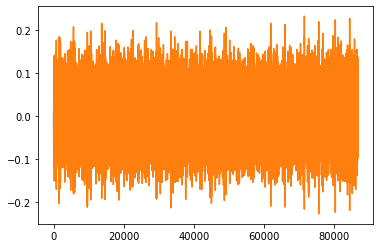

In [ ]:
db.show_batch(max_n=4)

In [ ]:
# model = SimpleGRU(1,1,num_layers=1,hidden_size=10)
# model = SimpleQRNN(1,1,hidden_size=20,n_layers=10,window=2)
model = TCN(1,1,hl_depth=7,hl_width=20)
# model = ConvGRU(1,1,num_ft=20,num_cnn_layers=6)
# model = ConvQRNN(1,1,num_ft=50,num_cnn_layers=7,num_rnn_layers=2)

In [ ]:
skip = partial(SkipNLoss,n_skip=100)
lrn = Learner(db,model,loss_func=skip(nn.MSELoss()),opt_func=ranger,metrics=[skip(fun_rmse)])

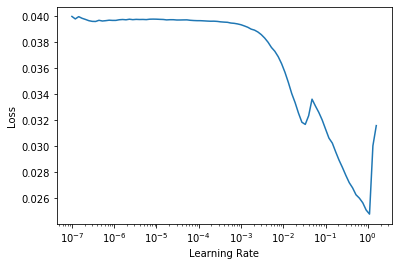

In [ ]:
lrn.lr_find()

In [ ]:
lrn.fit_one_cycle(30,lr_max=3e-2,pct_start=0.05)

epoch,train_loss,valid_loss,fun_rmse,time
0,0.000259,0.000252,0.011871,00:03
1,0.001892,0.000309,0.014213,00:03
2,0.000703,0.000263,0.012761,00:03
3,0.000300,0.000321,0.015410,00:03
4,0.000166,0.000237,0.012576,00:03
5,0.000118,0.000278,0.014669,00:03
6,0.000096,0.000223,0.012132,00:03
7,0.000079,0.000321,0.015745,00:03
8,0.000077,0.000216,0.011017,00:03
9,0.000064,0.000300,0.015372,00:03


<IPython.core.display.Javascript object>


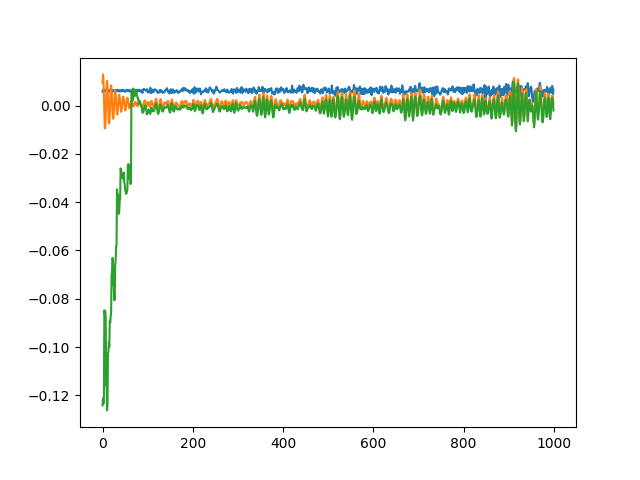

<IPython.core.display.Javascript object>


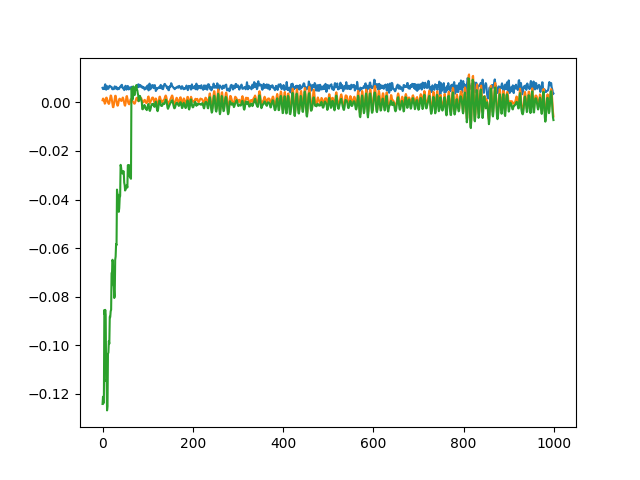

<IPython.core.display.Javascript object>


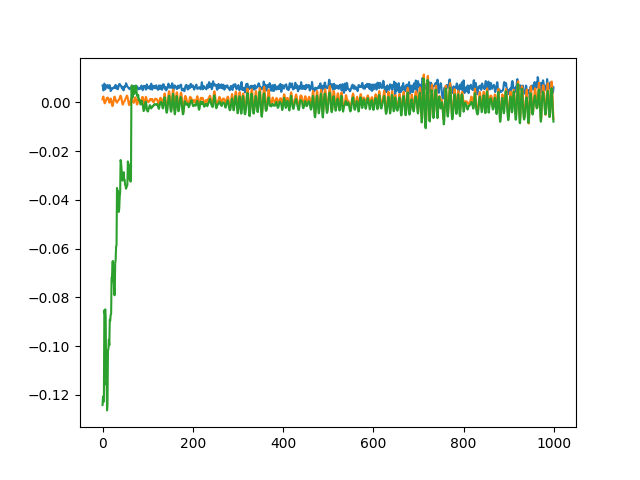

<IPython.core.display.Javascript object>


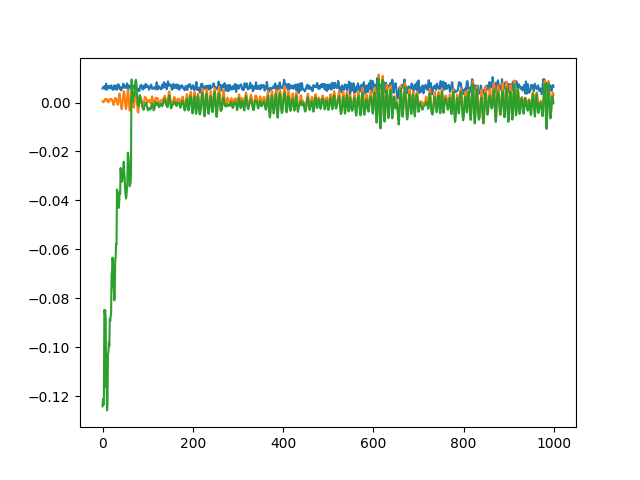

<IPython.core.display.Javascript object>


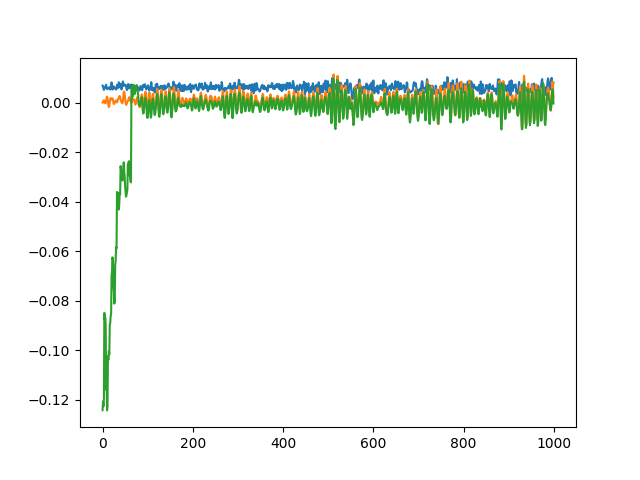

In [ ]:
lrn.show_results(ds_idx=1,max_n=5)

## Test

<IPython.core.display.Javascript object>


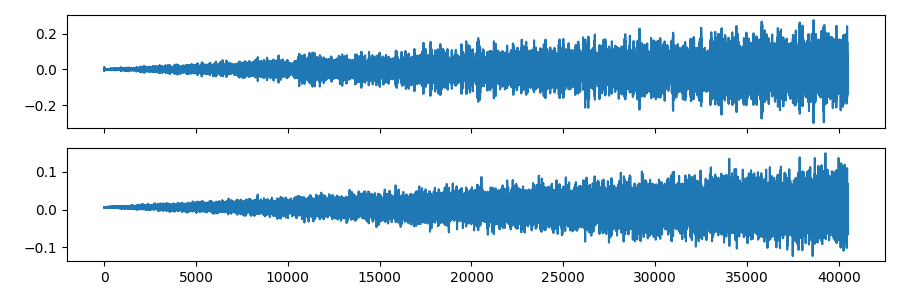

In [ ]:
f_tst = hdf_files = L([f for f in get_hdf_files(f_paths) if 'test' in str(f)])
db_tst = (DataBlock(blocks=(SequenceBlock.from_hdf(['u'],TensorSequencesInput),#,clm_shift=[-11000]),
                        SequenceBlock.from_hdf(['y'],TensorSequencesOutput)),#,clm_shift=[-11000])),
                     splitter=IndexSplitter(None))
            .databunch(f_tst,bs=1))

db_tst.show_batch(max_n=1)

<IPython.core.display.Javascript object>


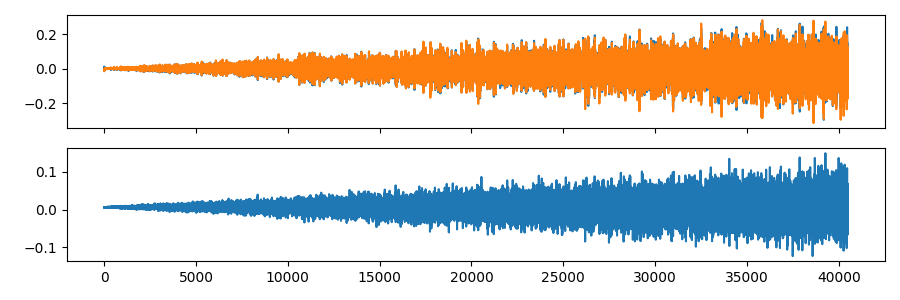

In [ ]:
lrn.show_results(dl=db_tst.train_dl)

In [ ]:
lrn.validate(dl=db_tst.train_dl)

(#2) [0.00025975416065193713,0.01611689105629921]